In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("Outliers.csv")

In [8]:
import matplotlib.pyplot as plt

initial plot

<AxesSubplot:>

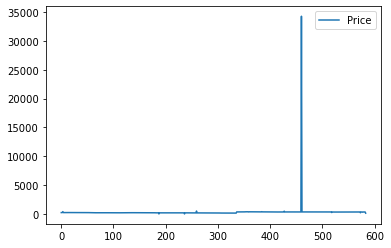

In [43]:
data.plot()

we have a spike distorting the view so well remove that to have an initial look

<AxesSubplot:>

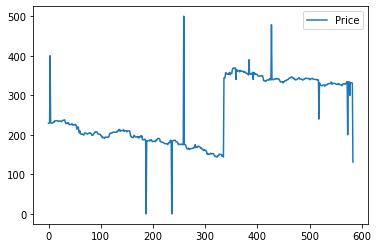

In [4]:
data.drop(data[data["Price"].diff(1) > 1000].index).plot()

see if data is normally distributed

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

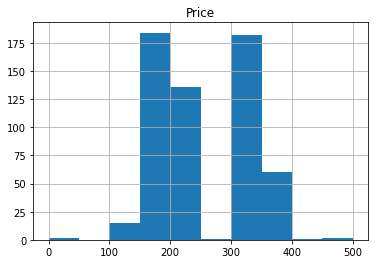

In [42]:
data.drop(data[data["Price"].diff(1) > 1000].index).hist()

clearly theres a breakpoint with two means. first model does not seem to be stationary


<AxesSubplot:>

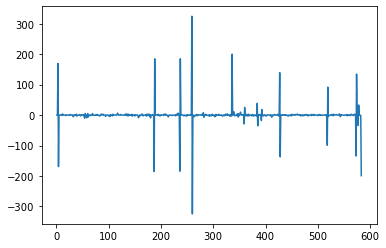

In [5]:
temp = data.drop(data[data["Price"].diff(1) > 1000].index).dropna()
temp["Price"].diff(1).plot()

split the data and see how the data is distributed

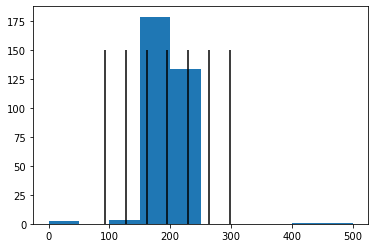

In [45]:
breakpoint = 320


plt.hist(temp["Price"].iloc[:breakpoint])

mean = temp["Price"].iloc[:breakpoint].mean()
std = temp["Price"].iloc[:breakpoint].std()
ym = 150

plt.vlines(x = mean - std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean - 2*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + 2*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean - 3*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + 3*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean , ymin = 0, ymax = ym, color="k")




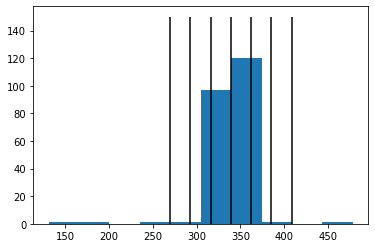

In [46]:
breakpoint = 360


plt.hist(temp["Price"].iloc[breakpoint:])

mean = temp["Price"].iloc[breakpoint:].mean()
std = temp["Price"].iloc[breakpoint:].std()
ym = 150

plt.vlines(x = mean - std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean - 2*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + 2*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean - 3*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean + 3*std, ymin = 0, ymax = ym, color="k")
plt.vlines(x = mean , ymin = 0, ymax = ym, color="k")




seems close to normal once we remove outliers we can do a test to see if this is true. 

In [117]:
from scipy.stats import shapiro, probplot


 	 Test Statistics=0.737, p=0.000
 	 Not normally distributed


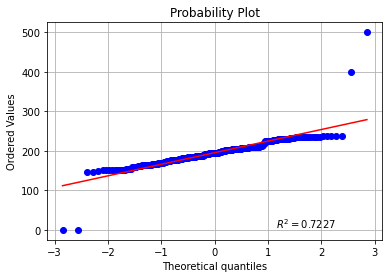

In [56]:
breakpoint = 320
Data = temp["Price"].iloc[:breakpoint]
alpha = 0.05
stat, p = shapiro(Data)
plt.figure()
probplot(Data, plot=plt, rvalue=True)
plt.grid()
print("\n \t Test Statistics=%.3f, p=%.3f" %(stat, p))
if p >= alpha:
    print(" \t Normally distributed")
else:
    print(" \t Not normally distributed")


 	 Test Statistics=0.552, p=0.000
 	 Not normally distributed


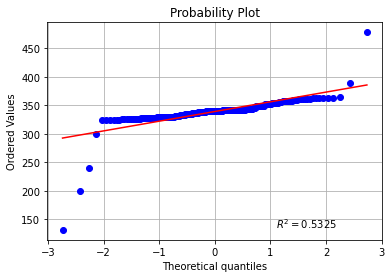

In [57]:
breakpoint = 360

Data = temp["Price"].iloc[breakpoint:].dropna()
alpha = 0.05
stat, p = shapiro(Data)
plt.figure()
probplot(Data, plot=plt, rvalue=True)
plt.grid()
print("\n \t Test Statistics=%.3f, p=%.3f" %(stat, p))
if p >= alpha:
    print(" \t Normally distributed")
else:
    print(" \t Not normally distributed")

# heres an idea. 

say you get the qq plot for the whole data. you can see the structural breaks, and you can see the outliers. 
if we identify them automatically and remove them then problem solved. 


 	 Test Statistics=0.860, p=0.000
 	 Not normally distributed


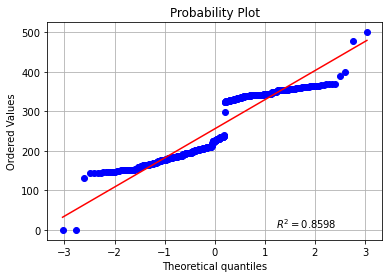

In [58]:

Data = temp["Price"].dropna()
alpha = 0.05
stat, p = shapiro(Data)
plt.figure()
probplot(Data, plot=plt, rvalue=True)
plt.grid()
print("\n \t Test Statistics=%.3f, p=%.3f" %(stat, p))
if p >= alpha:
    print(" \t Normally distributed")
else:
    print(" \t Not normally distributed")

does acf or pacf help?


In [7]:
from statsmodels.tsa.stattools import adfuller, pacf, acf

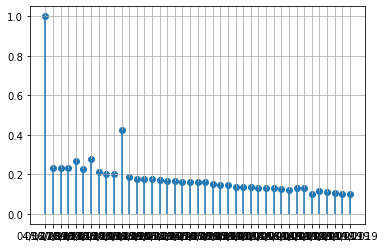

In [33]:
ys = acf(temp["Price"].iloc[breakpoint:])
xs = temp["Date"].iloc[breakpoint:breakpoint+41]
plt.figure()
plt.scatter(xs,ys)
plt.grid()
plt.vlines(xs, 0, ys)
plt.plot(ys[1])

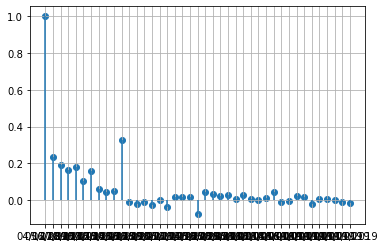

In [34]:
ys = pacf(temp["Price"].iloc[breakpoint:])
xs = temp["Date"].iloc[breakpoint:breakpoint+41]
plt.figure()
plt.scatter(xs,ys)
plt.grid()
plt.vlines(xs, 0, ys)
plt.plot(ys[1])

In [14]:
import numpy as np

<AxesSubplot:>

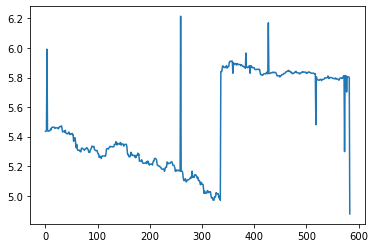

In [18]:
data["Price"].drop(data[data["Price"].diff(1) > 1000].index).apply(np.log).plot()

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [56]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)

# load the dataset
dataframe = data[["Price"]]
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Epoch 1/50
 - 2s - loss: 7.1839e-06
Epoch 2/50
 - 1s - loss: 4.6383e-06
Epoch 3/50
 - 1s - loss: 4.1829e-06
Epoch 4/50
 - 1s - loss: 3.5805e-06
Epoch 5/50
 - 1s - loss: 3.6308e-06
Epoch 6/50
 - 1s - loss: 2.8001e-06
Epoch 7/50
 - 1s - loss: 2.1968e-06
Epoch 8/50
 - 1s - loss: 1.7711e-06
Epoch 9/50
 - 1s - loss: 1.4554e-06
Epoch 10/50
 - 1s - loss: 1.5021e-06
Epoch 11/50
 - 1s - loss: 1.4381e-06
Epoch 12/50
 - 1s - loss: 1.4146e-06
Epoch 13/50
 - 1s - loss: 1.1226e-06
Epoch 14/50
 - 1s - loss: 1.6232e-06
Epoch 15/50
 - 1s - loss: 1.6254e-06
Epoch 16/50
 - 1s - loss: 1.1960e-06
Epoch 17/50
 - 1s - loss: 1.5650e-06
Epoch 18/50
 - 1s - loss: 1.7254e-06
Epoch 19/50
 - 1s - loss: 1.2017e-06
Epoch 20/50
 - 1s - loss: 1.2263e-06
Epoch 21/50
 - 1s - loss: 1.3662e-06
Epoch 22/50
 - 1s - loss: 1.3425e-06
Epoch 23/50
 - 1s - loss: 1.3253e-06
Epoch 24/50
 - 1s - loss: 1.3867e-06
Epoch 25/50
 - 1s - loss: 1.5824e-06
Epoch 26/50
 - 1s - loss: 1.2489e-06
Epoch 27/50
 - 1s - loss: 1.2747e-06
Epoch 28/5

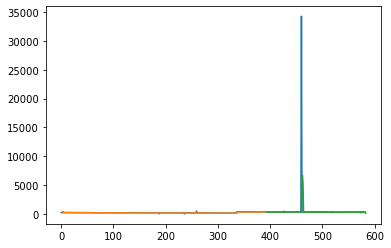

In [57]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [78]:
df = pd.DataFrame(trainPredictPlot, columns=["Train"])
main = pd.DataFrame(scaler.inverse_transform(dataset), columns=["Price"])


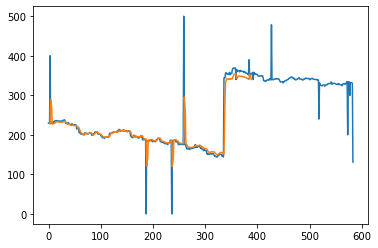

In [107]:
fig, ax = plt.subplots()

ax.plot(main["Price"])
ax.plot(df["Train"].apply(lambda x: x+20))


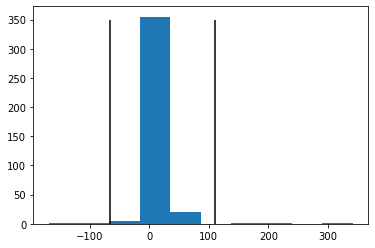

In [115]:

residuals = main["Price"] - df["Train"]
plt.hist(residuals)
plt.vlines(residuals.mean() + 3*residuals.std(), 0, 350, color='k')
plt.vlines(residuals.mean() - 3*residuals.std(), 0, 350, color='k')



In [137]:
main = main.drop(residuals[residuals > 2*residuals.std()].index).drop(residuals[residuals < -2*residuals.std()].index)


AttributeError: 'AxesSubplot' object has no attribute 'drop'

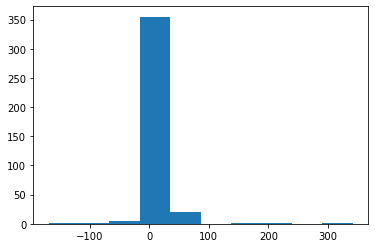

In [131]:
df2 = pd.DataFrame(testPredictPlot, columns=["Test"])
residuals2 = main["Price"] - df2["Test"]
plt.hist(residuals)
main = main.drop(residuals2[residuals2 > 2*residuals2.std()].index).drop(residuals2[residuals2 < -2*residuals2.std()].index)



<AxesSubplot:>

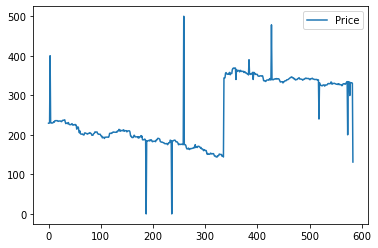

In [134]:
main.plot()


 	 Test Statistics=0.397, p=0.000
 	 Not normally distributed


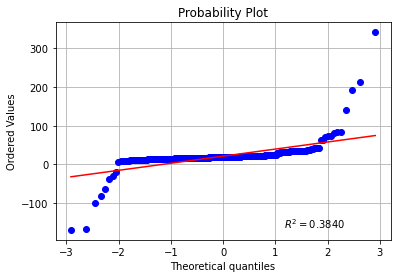

In [118]:


alpha = 0.05
stat, p = shapiro(residuals.dropna())
plt.figure()
probplot(residuals.dropna(), plot=plt, rvalue=True)
plt.grid()
print("\n \t Test Statistics=%.3f, p=%.3f" %(stat, p))
if p >= alpha:
    print(" \t Normally distributed")
else:
    print(" \t Not normally distributed")

In [55]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.losses import Huber
import pandas as pd 

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = pd.read_csv("Outliers.csv")["Price"]

# choose a number of time steps
n_steps = 5

# split into samples
X, y = split_sequence(raw_seq, n_steps)


X

array([[229.4 , 229.4 , 230.5 , 400.1 , 230.9 ],
       [229.4 , 230.5 , 400.1 , 230.9 , 229.7 ],
       [230.5 , 400.1 , 230.9 , 229.7 , 230.  ],
       ...,
       [333.82, 299.41, 332.5 , 331.74, 331.74],
       [299.41, 332.5 , 331.74, 331.74, 331.74],
       [332.5 , 331.74, 331.74, 331.74, 330.2 ]])

In [38]:
#X = X.reshape(-1,1)

In [56]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X= X.reshape((X.shape[0], X.shape[1], n_features))
#X.reshape(-1,1)

In [64]:
X.shape

(579, 5, 1)

In [108]:
model = Sequential([Conv1D(filters=4, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=(n_steps, n_features)),
                    LSTM(4, return_sequences=False),
                    Dense(1),
                    Lambda(lambda x: x * 200)
])


In [109]:

lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = SGD(lr=1e-8, momentum=0.9)
model.compile(loss=Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [110]:
model.fit(X, y, epochs=200, verbose=0)

In [111]:
predict = model.predict(X)

In [112]:
xs = pd.DataFrame({"Price":X.reshape(-1)})


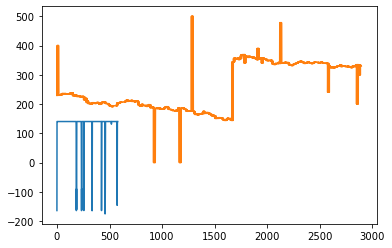

In [113]:
plt.plot(predict)
plt.plot(xs.drop(xs[xs["Price"]>1000].index))

In [95]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=32, kernel_size=3, padding="causal"))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)


ValueError: Input 0 is incompatible with layer conv1d_7: expected ndim=3, found ndim=2

In [63]:
# demonstrate prediction
x_input = array(raw_seq.iloc[254:259])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(x_input, yhat)

[[[176.6 ]
  [176.14]
  [175.7 ]
  [175.94]
  [175.28]]] [[202.08324]]


In [8]:
# evaluate model performance with outliers removed using isolation forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error


In [21]:
import matplotlib.pyplot as plt

In [ ]:

# load the dataset
df = pd.read_csv("Outliers.csv")
# retrieve the array
data = df["Price"].values

In [13]:
data = data.reshape(-1, 1)

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(data)


<AxesSubplot:xlabel='Date', ylabel='Price'>

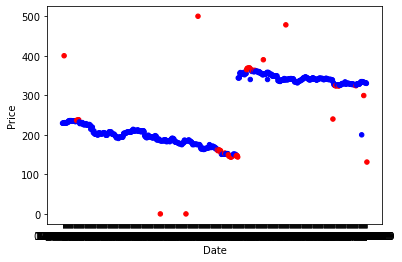

In [32]:
df["anomaly"] = yhat
df2 = df.drop(df[df["Price"] > 1000].index)
colors = ['r' if flag == -1 else 'b' for flag in df2.anomaly]
df2.plot.scatter("Date", "Price", color=colors)

In [10]:


# split into input and output elements
X, y = data[:-1], data[-1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)


TypeError: Singleton array 131.2 cannot be considered a valid collection.

In [ ]:

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)